# 檢視 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [教學目標]
我們已經學過統計值與直方圖, 試著用這些工具尋找與觀察可能的離群值

# [範例重點]
- 使用統計值與直方圖, 觀察離群值 (In[3], Out[3], In[4], Out[4])
- 將疑似離群值的資料移除後, 看看剩餘的資料是否正常 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# 設定 data_path
dir_data = './data/'

In [4]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))

Path of read in data: ./data/application_train.csv


In [8]:
app_train = pd.read_csv(f_app)
print(app_train.shape)
app_train.head()

(1210, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [11]:
type(app_train['DAYS_BIRTH'])

pandas.core.series.Series

In [14]:
app_train['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

## 開始檢視不同欄位是否有異常值

In [12]:
# DAYS_BIRTH: 客戶申請貸款時的年齡
(app_train['DAYS_BIRTH'] / (-365)).describe()

count    1210.000000
mean       43.465964
std        11.820505
min        21.109589
25%        33.356849
50%        42.980822
75%        53.160274
max        68.778082
Name: DAYS_BIRTH, dtype: float64

In [16]:
# DAYS_EMPLOYED: 申請貸款前，申請人已在現職工作的時間
(app_train['DAYS_EMPLOYED'] /(-365)).describe()


count    1210.000000
mean     -162.603731
std       376.479559
min     -1000.665753
25%         0.816438
50%         3.347945
75%         7.207534
max        42.827397
Name: DAYS_EMPLOYED, dtype: float64

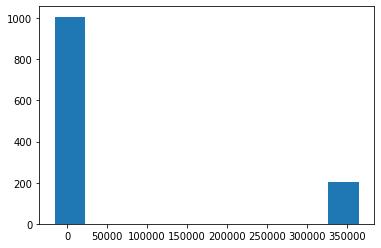

 365243    203
-215         4
-2402        3
-146         3
-300         3
-225         3
-3443        3
-239         2
-2224        2
-362         2
-189         2
-261         2
-561         2
-1787        2
-2419        2
-1228        2
-552         2
-721         2
-3090        2
-1247        2
-290         2
-992         2
-2784        2
-741         2
-263         2
-1434        2
-749         2
-975         2
-1496        2
-687         2
          ... 
-2376        1
-3159        1
-1191        1
-308         1
-1262        1
-1206        1
-3606        1
-1836        1
-1256        1
-5348        1
-1251        1
-3298        1
-1249        1
-1244        1
-3291        1
-5332        1
-1235        1
-1234        1
-3281        1
-716         1
-1227        1
-1223        1
-5317        1
-7364        1
-3266        1
-2631        1
-7359        1
-1210        1
-5076        1
-1716        1
Name: DAYS_EMPLOYED, Length: 911, dtype: int64

In [17]:
plt.hist(app_train['DAYS_EMPLOYED'])
plt.show()
app_train['DAYS_EMPLOYED'].value_counts()

### 從上面的圖與數值可以看出, 365243 顯然是個奇怪的數值

In [18]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 7.35% of loans
The anomalies default on 5.91% of loans
There are 203 anomalous days of employment


In [19]:
sum(app_train['DAYS_EMPLOYED'] == 365243)/len(app_train)

0.16776859504132233

False    1007
True      203
Name: DAYS_EMPLOYED_ANOM, dtype: int64


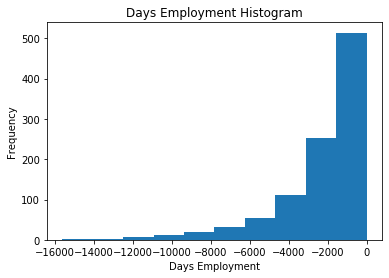

In [20]:
# 新增一個欄位: DAYS_EMPLOYED_ANOM 來標記 DAYS_EMPLOYED 是否異常
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
print(app_train['DAYS_EMPLOYED_ANOM'].value_counts())

# 這邊我們用 nan 將異常值取代
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

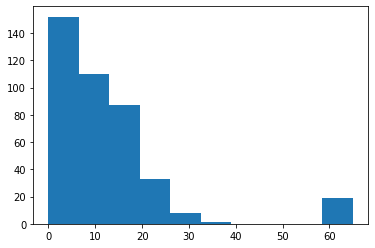

1.0     29
2.0     28
7.0     26
3.0     26
11.0    22
4.0     22
6.0     21
5.0     19
13.0    19
17.0    18
9.0     17
10.0    17
8.0     16
64.0    14
15.0    14
12.0    12
16.0    12
14.0    11
22.0    11
21.0    11
0.0      7
19.0     7
20.0     7
18.0     6
65.0     5
27.0     3
26.0     3
23.0     2
24.0     1
25.0     1
28.0     1
30.0     1
36.0     1
Name: OWN_CAR_AGE, dtype: int64

In [21]:
# 檢查 OWN_CAR_AGE: 貸款人的車齡
plt.hist(app_train[~app_train.OWN_CAR_AGE.isnull()]['OWN_CAR_AGE'])
plt.show()
app_train['OWN_CAR_AGE'].value_counts()

In [22]:
app_train[app_train['OWN_CAR_AGE'] > 50]['OWN_CAR_AGE'].value_counts()

64.0    14
65.0     5
Name: OWN_CAR_AGE, dtype: int64

### 從上面我們可以發現車齡為 64, 65 的人特別多，是否合理?
* 記得，這沒有正確答案 - 但我們總是可以給他們一些標記，讓最後的模型來決定

In [9]:
print("Target of OWN_CAR_AGE >= 50: %.2f%%" % (app_train[app_train['OWN_CAR_AGE'] >= 50 ]['TARGET'].mean() * 100 ))
print("Target of OWN_CAR_AGE < 50: %.2f%%" % (app_train[app_train['OWN_CAR_AGE'] < 50]['TARGET'].mean() * 100))

app_train['OWN_CAR_AGE_ANOM'] = app_train['OWN_CAR_AGE'] >= 50

Target of OWN_CAR_AGE >= 50: 8.36%
Target of OWN_CAR_AGE < 50: 7.21%
